In [35]:
import cbb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

<Axes: >

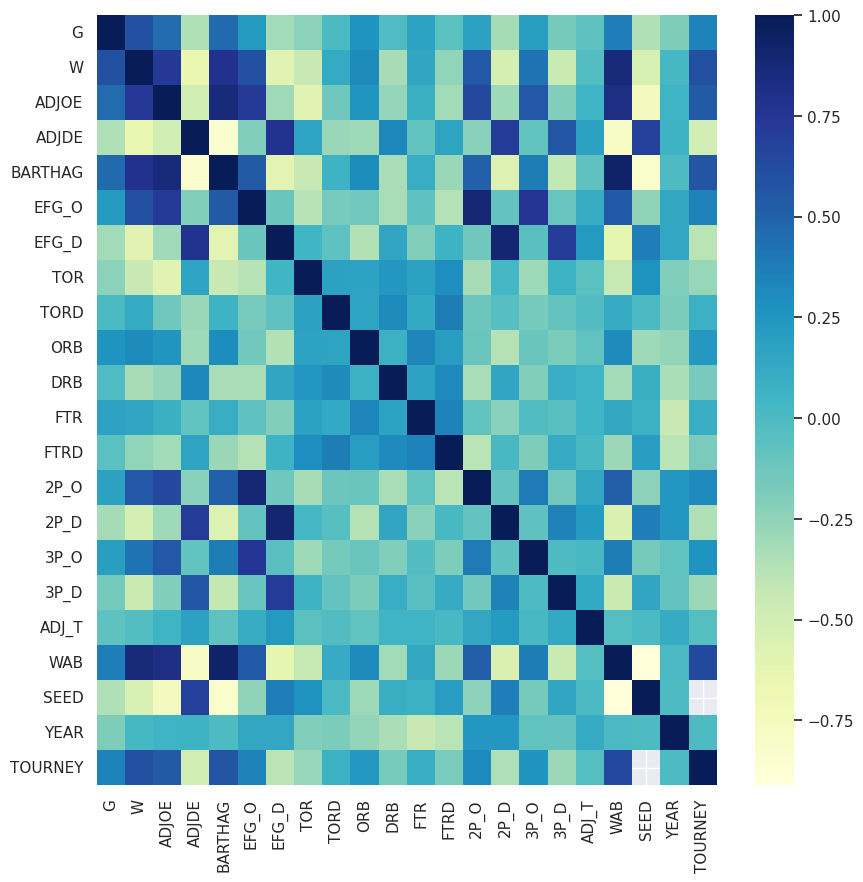

In [36]:
df = cbb.initDataset()
for_sns = df.drop(columns=['TEAM', 'CONF', 'POSTSEASON'])
sns.heatmap(for_sns.corr(), cmap="YlGnBu")

In [37]:
df_pair = df.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'G', 'W', 'BARTHAG', 'WAB'])
sns.pairplot(df_pair, kind='reg', hue='TOURNEY')

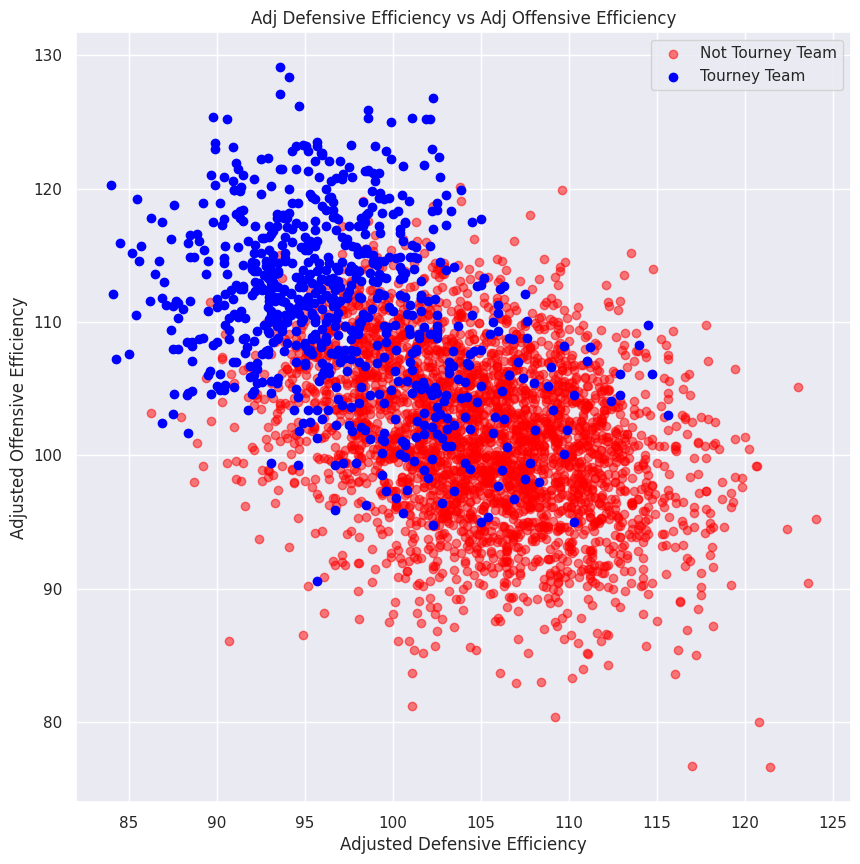

In [38]:
df_bad = df[df['TOURNEY'] == False]
df_tourney = df[df['TOURNEY'] == True]

fig, ax = plt.subplots()
ax.scatter(df_bad['ADJDE'], df_bad['ADJOE'], c='red', alpha=.5, label='Not Tourney Team')
ax.scatter(df_tourney['ADJDE'], df_tourney['ADJOE'], c='blue', label='Tourney Team')
ax.legend(loc='best')
plt.ylabel("Adjusted Offensive Efficiency")
plt.xlabel("Adjusted Defensive Efficiency")
plt.title("Adj Defensive Efficiency vs Adj Offensive Efficiency")
plt.show()

In [39]:
visual_df = df.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'TOURNEY'])
dict2 = {
    'G':'Games',
    'W':'Wins',
    'ADJOE':'Adjusted Offensive Efficiency',
    'ADJDE':'Adjusted Defensive Efficiency',
    'BARTHAG':'Chance of Beating an Average DI Team',
    'EFG_O':'Effective Field Goal Percentage Shot',
    'EFG_D':'Effective Field Goal Percentage Allowed',
    'TOR':'Turnover Rate',
    'TORD':'Steal Rate',
    'ORB':'Offensive Rebound Rate',
    'DRB':'Offensive Rebound Rate Allowed',
    'FTR':'Free Throw Rate',
    'FTRD':'Free Throw Rate Allowed',
    '2P_O':'Two-Point Shooting Percentage',
    '2P_D':'Two-Point Shooting Percentage Allowed',
    '3P_O':'Three-Point Shooting Percentage',
    '3P_D':'Three-Point Shooting Percentage Allowed',
    'ADJ_T':'Adjusted Tempo',
    'WAB':'Wins Above Bubble'
}

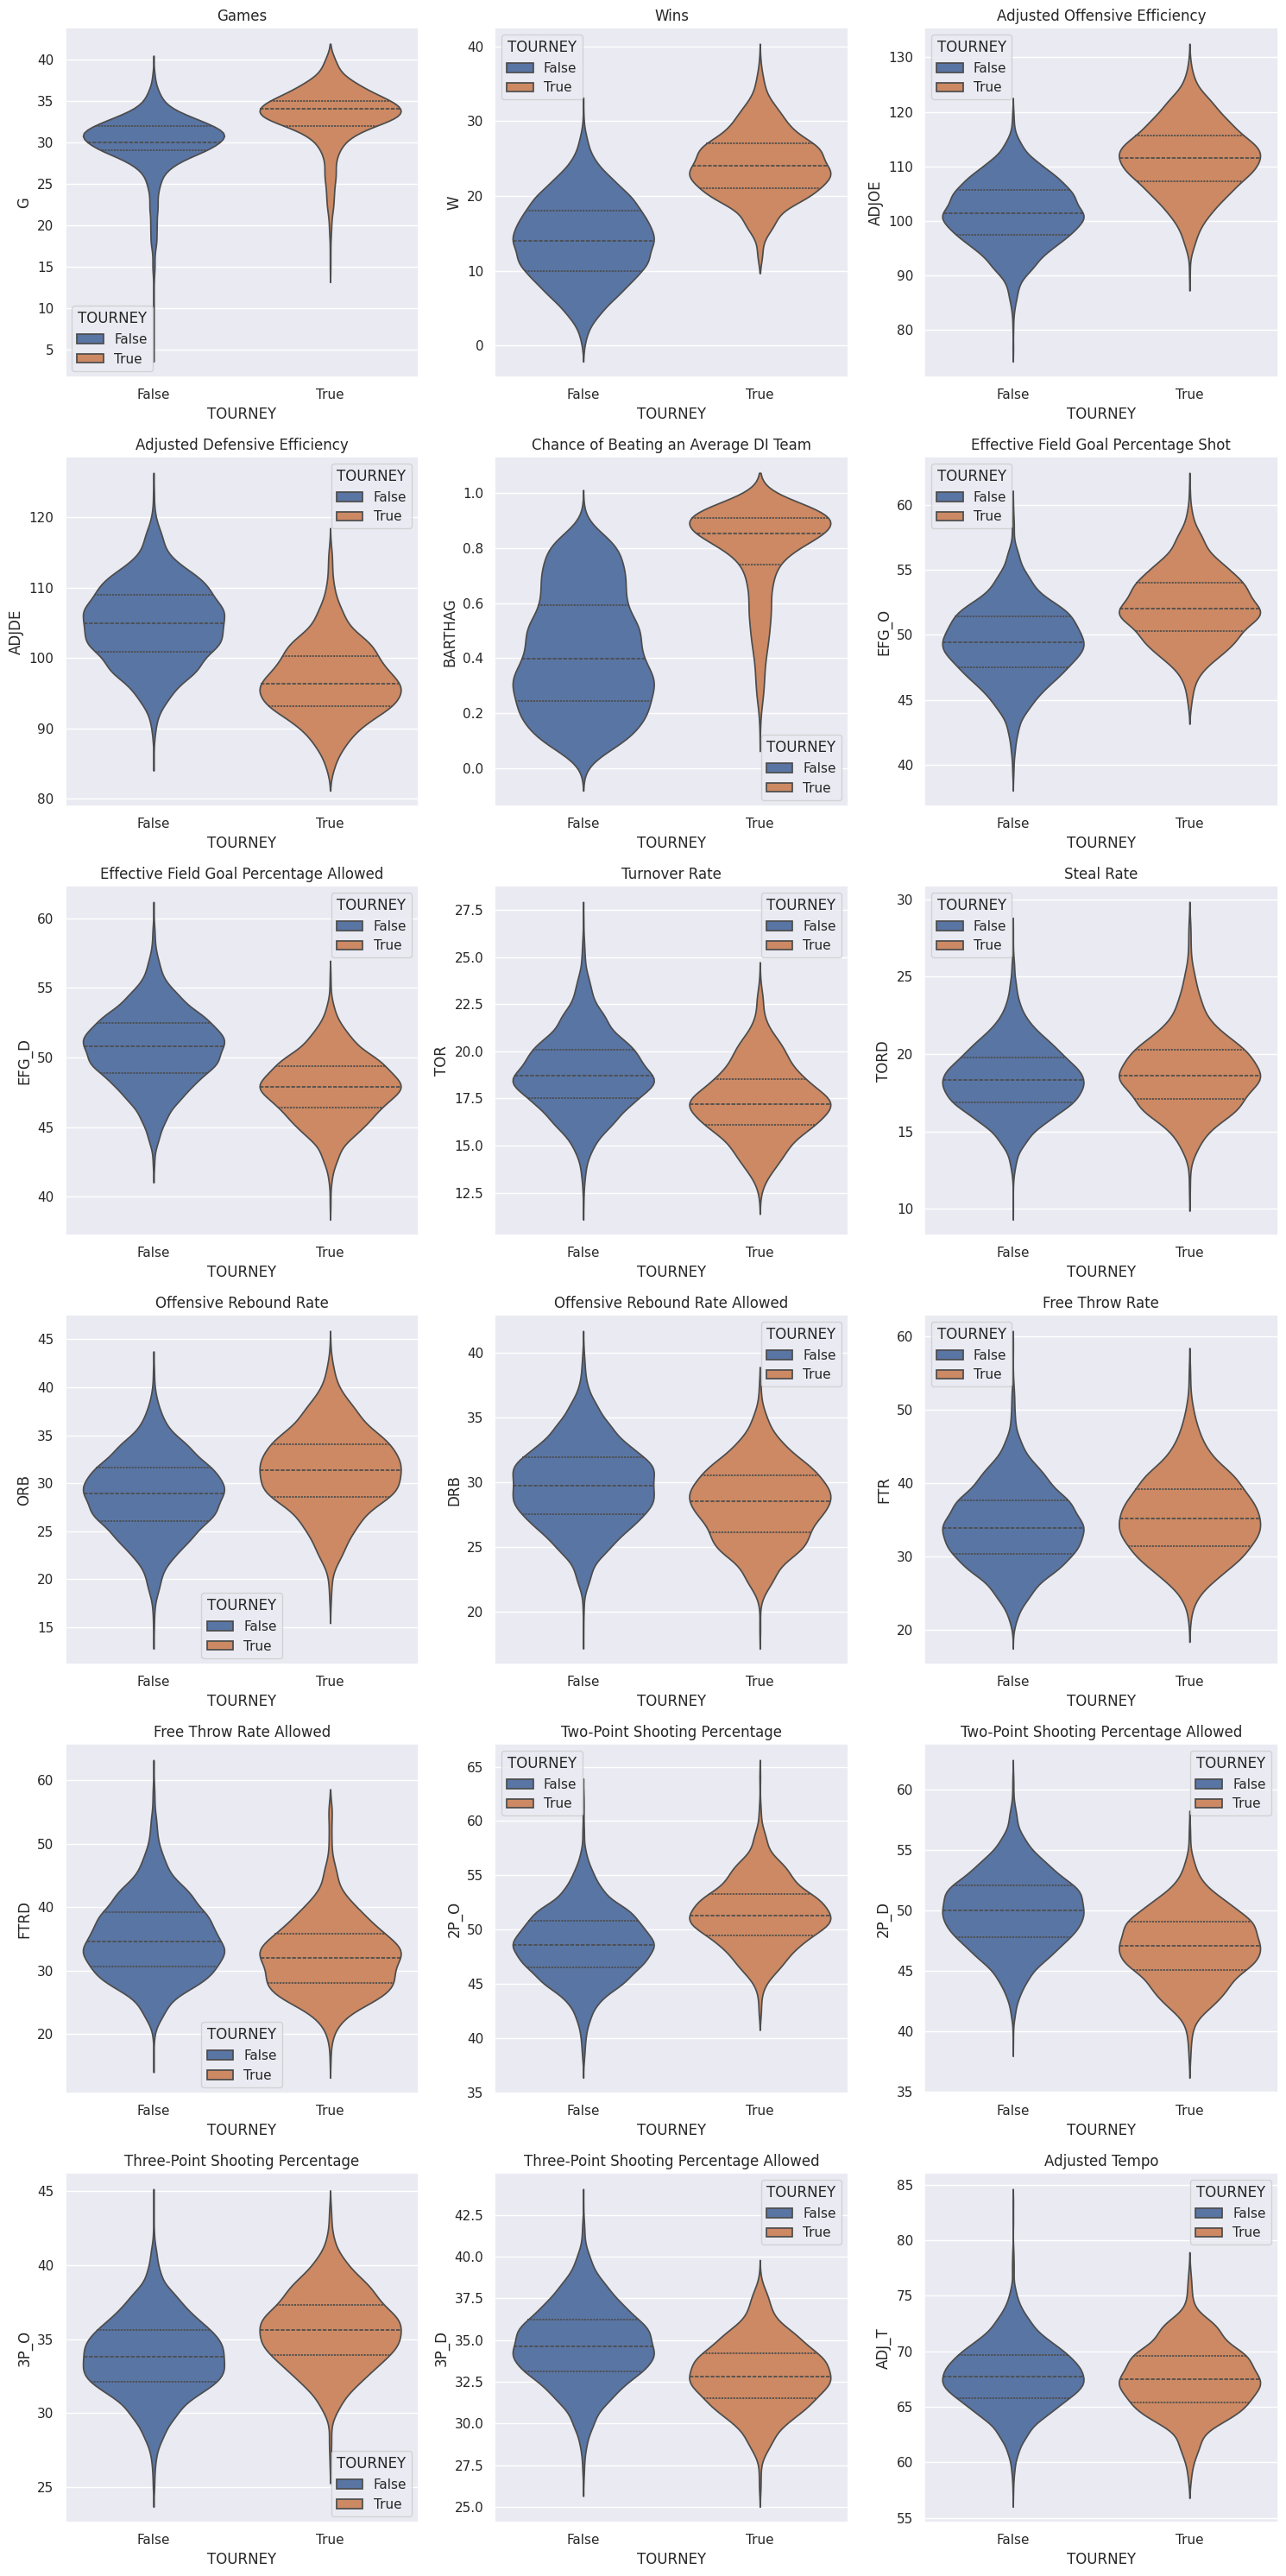

In [40]:
fig = plt.figure(figsize=(30,30))
grid = fig.add_gridspec(6,6)
subplot_list = []
for x in range(0,6):
    for y in range(0,3):
        subplot_list.append(fig.add_subplot(grid[x,y]))

cols = visual_df.columns
for col, subplot in zip(cols, subplot_list):
    sns.violinplot(x = 'TOURNEY', y=col, data=df, inner='quartiles', ax=subplot, hue="TOURNEY")
    subplot.set_title(dict2[col])

fig.tight_layout()
plt.show()

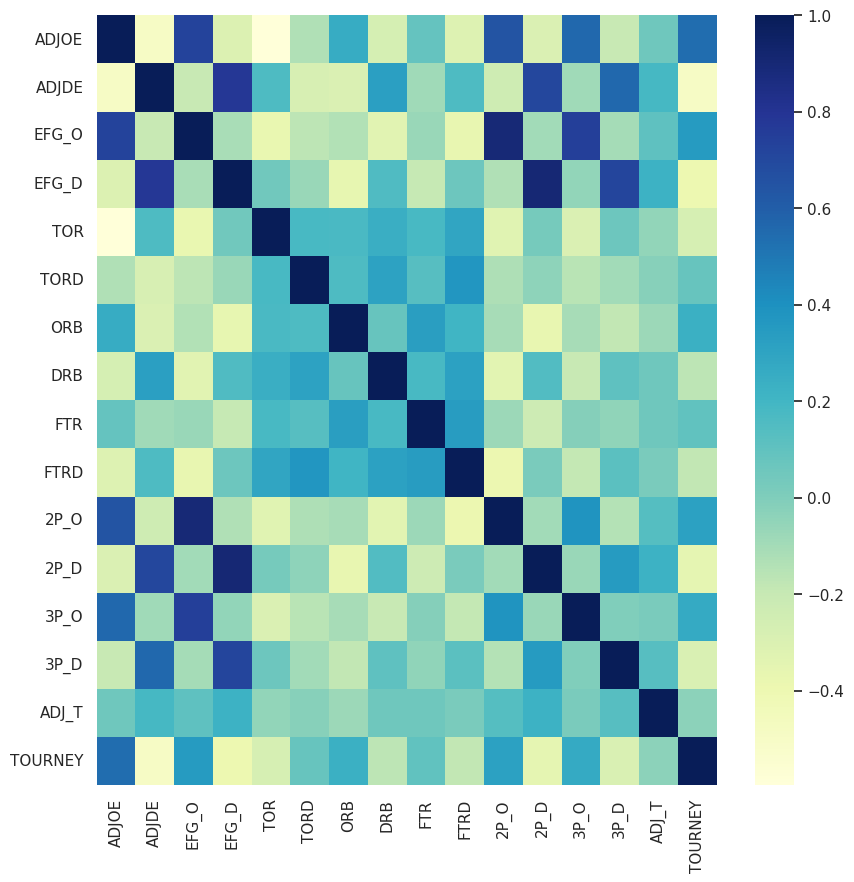

In [41]:
cbb = df.drop(columns=['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR', 'G', 'W', 'BARTHAG', 'WAB'])
sns.heatmap(cbb.corr(), cmap="YlGnBu")
sns.set_theme(rc={'figure.figsize':(10,10)})

In [3]:
from sklearn import tree, preprocessing, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [43]:
cbb_features = cbb.iloc[:,:-1]
cbb_label = cbb['TOURNEY']

ind = []
dep = []
pval = []

for col in cbb_features:
    csq = chi2_contingency(pd.crosstab(cbb[col], cbb['TOURNEY']))
    pval.append(csq[1])
    if csq[1] > .05:
        ind.append(col)
    else:
        dep.append(col)
    print(str(col) + " p-value: " + str(csq[1]))

print("Independent Features: " + str(ind))
print("Dependent Features: " + str(dep))

ADJOE p-value: 5.573732387515117e-159
ADJDE p-value: 8.17646502589107e-131
EFG_O p-value: 2.212173458298919e-59
EFG_D p-value: 3.596901399000123e-78
TOR p-value: 1.4976867881129718e-34
TORD p-value: 0.006356922748534979
ORB p-value: 1.0936082698608612e-14
DRB p-value: 0.00015924111567797974
FTR p-value: 0.26792706254669885
FTRD p-value: 1.2860119688381052e-05
2P_O p-value: 3.349723652008944e-41
2P_D p-value: 1.2514317917788073e-55
3P_O p-value: 8.440181335047427e-26
3P_D p-value: 1.651531559077611e-30
ADJ_T p-value: 0.042384853021885986
Independent Features: ['FTR']
Dependent Features: ['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T']


In [44]:
cbb = cbb.drop(columns=ind)

cbb_features = cbb.iloc[:,:-1]
cbb_label = cbb['TOURNEY']

X = cbb_features.values
y = cbb_label.values   

print(X.shape)
print(y.shape)

(3885, 14)
(3885,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=13)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
forest = RandomForestClassifier(random_state=13)
dt = tree.DecisionTreeClassifier(random_state=13)
svc = svm.SVC(random_state=13, kernel='linear')
forest.fit(X_train, y_train)
dt.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=13)

Text(0.5, 1.0, 'Feature Importance for Random Forest')

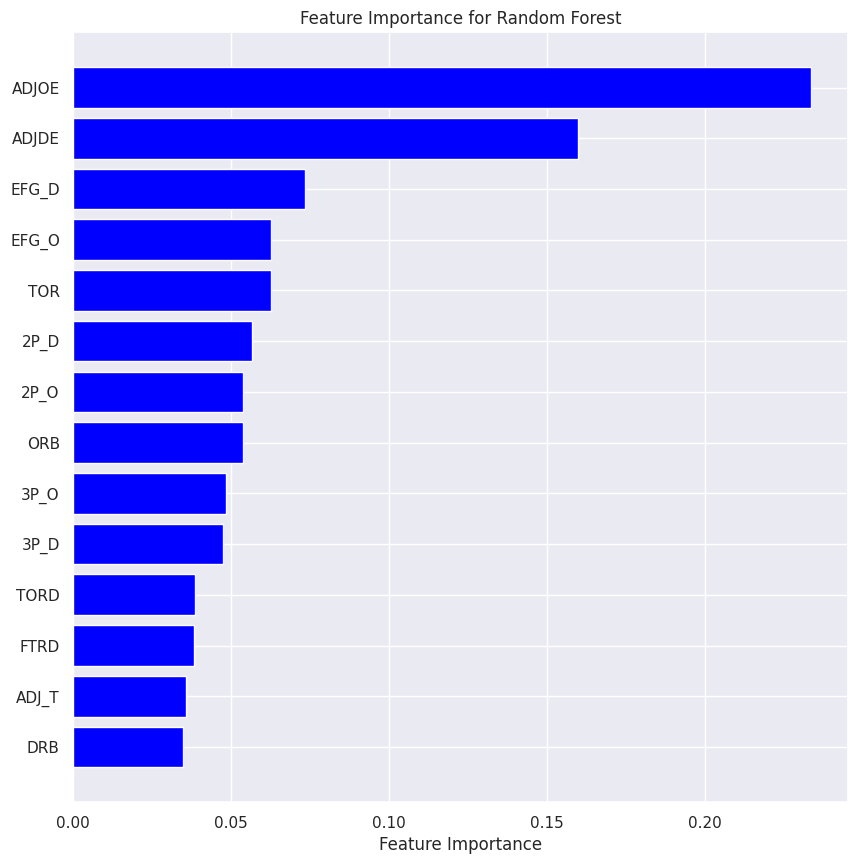

In [46]:
forest_sort = forest.feature_importances_.argsort()
plt.barh(cbb_features.columns[forest_sort], forest.feature_importances_[forest_sort], color=['blue'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Random Forest")

Text(0.5, 1.0, 'Feature Importance for Decision Tree Model')

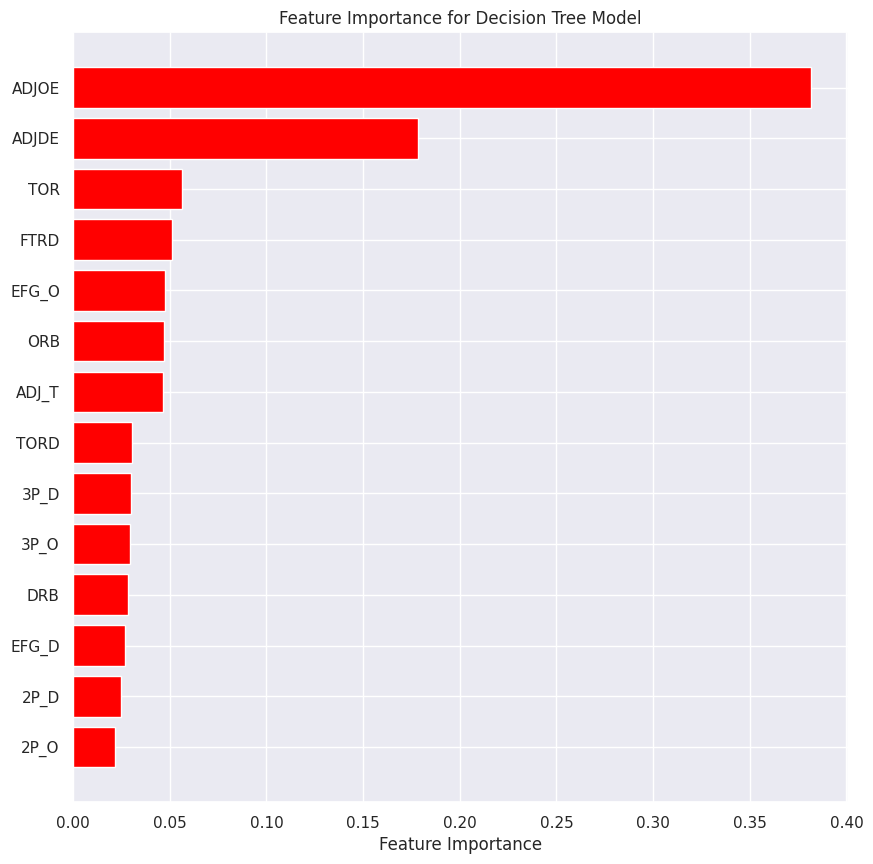

In [47]:
dt_sort = dt.feature_importances_.argsort()
plt.barh(cbb_features.columns[dt_sort], dt.feature_importances_[dt_sort], color=['red'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Decision Tree Model")

Text(0.5, 1.0, 'Model Coefficients for SVC Model')

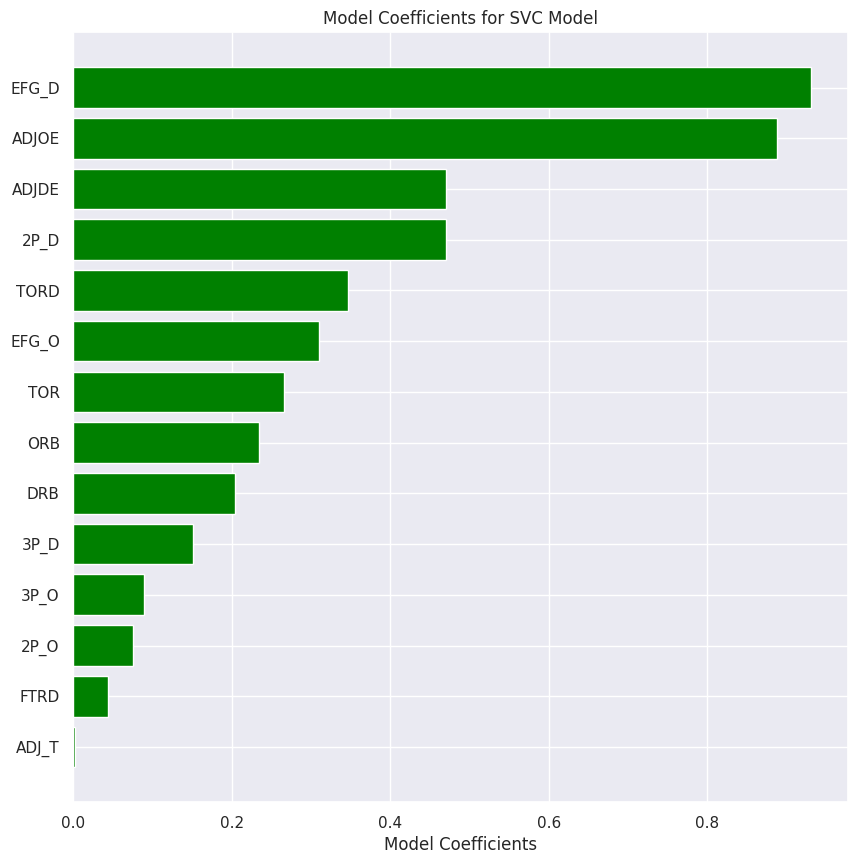

In [48]:
svc_sort = abs(svc.coef_[0]).argsort()
plt.barh(cbb_features.columns[svc_sort], abs(svc.coef_[0])[svc_sort], color=['green'])
plt.xlabel("Model Coefficients")
plt.title("Model Coefficients for SVC Model")

In [49]:
forest_params = {
    'n_estimators' : [100, 300, 500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 5, 6, 7, 8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [50]:
CV_forest = GridSearchCV(estimator=forest, param_grid=forest_params)
CV_forest.fit(X_train, y_train)
params = CV_forest.best_params_
print(params)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}


In [51]:
forest_model = RandomForestClassifier(criterion=params['criterion'], max_depth=params['max_depth'],
    max_features=params['max_features'], n_estimators=params['n_estimators'], random_state=13)

In [52]:
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94       785
        True       0.84      0.62      0.71       187

    accuracy                           0.90       972
   macro avg       0.88      0.80      0.83       972
weighted avg       0.90      0.90      0.90       972



Text(0.5, 76.24999999999999, 'Predicted Label')

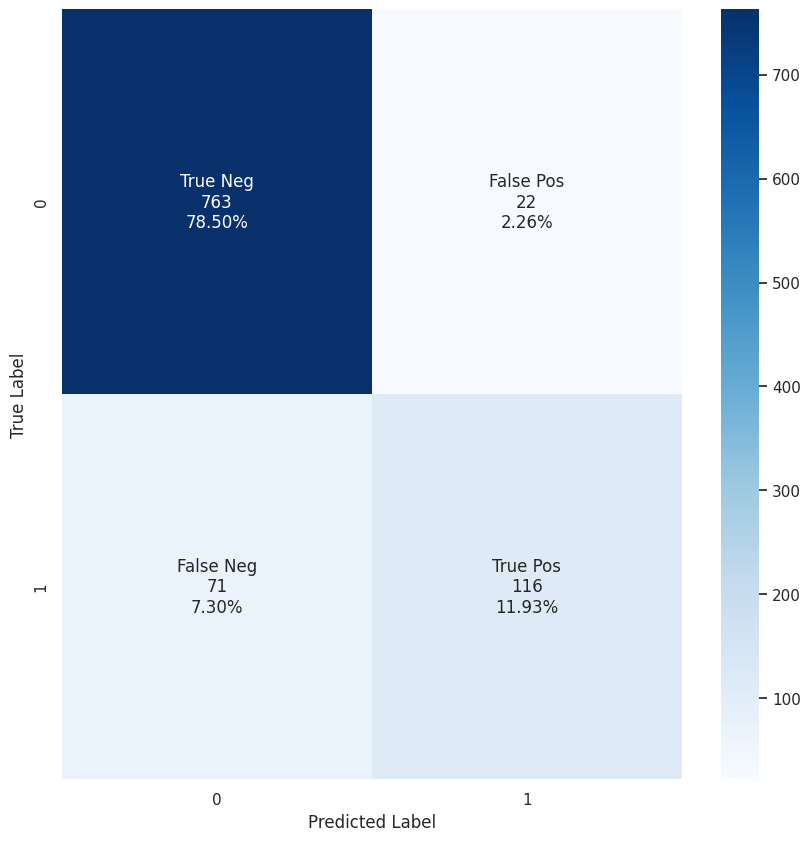

In [53]:
forest_cm = confusion_matrix(y_test, forest_pred)
group_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                forest_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     forest_cm.flatten()/np.sum(forest_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_name, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(forest_cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Comparing Feature Importance for Random Forest')

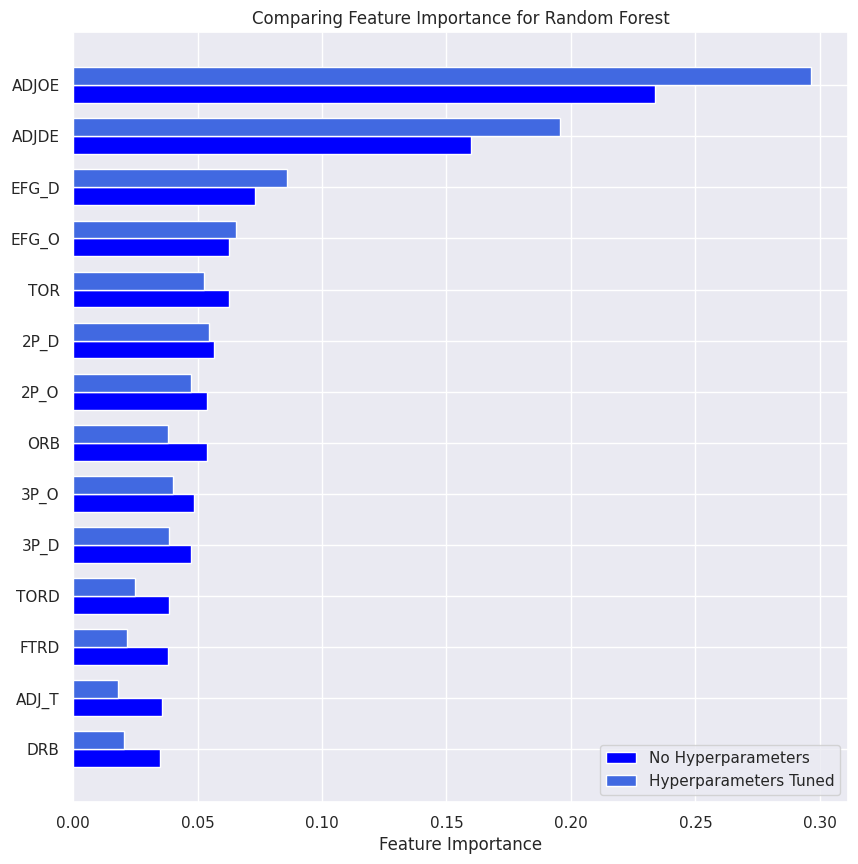

In [54]:
ind = np.arange(len(cbb_features.columns))
width = .35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, forest.feature_importances_[forest_sort], width, color='blue', label='No Hyperparameters')
rects2 = ax.barh(ind + width, forest_model.feature_importances_[forest_sort], width, color='royalblue', label='Hyperparameters Tuned')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(cbb_features.columns[forest_sort])
plt.legend(loc='best')
plt.xlabel("Feature Importance")
plt.title("Comparing Feature Importance for Random Forest")

In [55]:
dt_params = {
    'ccp_alpha' : [0.1, .01, .001],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 5, 6, 7, 8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [56]:
CV_dt = GridSearchCV(estimator=dt, param_grid=dt_params)
CV_dt.fit(X_train, y_train)
params = CV_dt.best_params_
print(params)

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}


In [57]:
dt_model = tree.DecisionTreeClassifier(criterion=params['criterion'], max_depth=params['max_depth'],
    max_features=params['max_features'], ccp_alpha=params['ccp_alpha'], random_state=13)

In [58]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.91      0.94      0.92       785
        True       0.70      0.60      0.65       187

    accuracy                           0.87       972
   macro avg       0.81      0.77      0.79       972
weighted avg       0.87      0.87      0.87       972



Text(0.5, 76.24999999999999, 'Predicted Label')

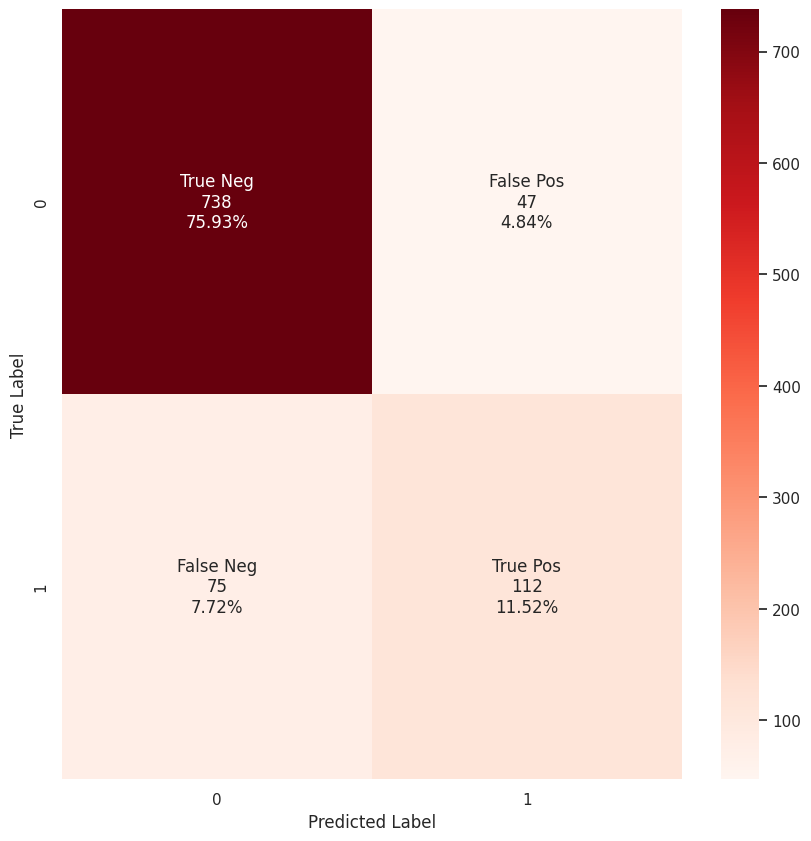

In [59]:
dt_cm = confusion_matrix(y_test, dt_pred)
group_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                    dt_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     dt_cm.flatten()/np.sum(dt_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_name, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Reds')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Comparing Feature Importance for Decision Tree')

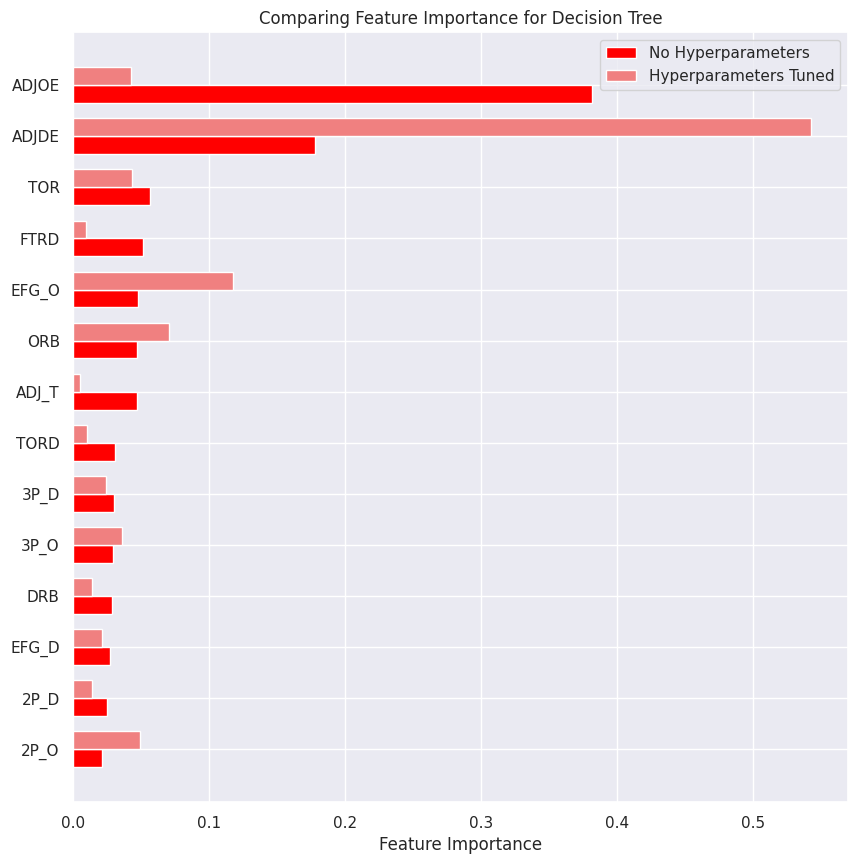

In [60]:
ind = np.arange(len(cbb_features.columns))
width = .35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.barh(ind, dt.feature_importances_[dt_sort], width, color='red', label='No Hyperparameters')
rects2 = ax.barh(ind + width, dt_model.feature_importances_[dt_sort], width, color='lightcoral', label='Hyperparameters Tuned')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(cbb_features.columns[dt_sort])
plt.legend(loc='best')
plt.xlabel("Feature Importance")
plt.title("Comparing Feature Importance for Decision Tree")

In [61]:
svc_params = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : ['scale', 'auto'],
}
CV_svc = GridSearchCV(estimator=svc, param_grid=svc_params)
CV_svc.fit(X_train, y_train)
params = CV_svc.best_params_
svc_model = svm.SVC(C=params['C'], gamma=params['gamma'], kernel='linear', random_state=13)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       785
        True       0.80      0.68      0.73       187

    accuracy                           0.91       972
   macro avg       0.86      0.82      0.84       972
weighted avg       0.90      0.91      0.90       972



Text(0.5, 76.24999999999999, 'Predicted Label')

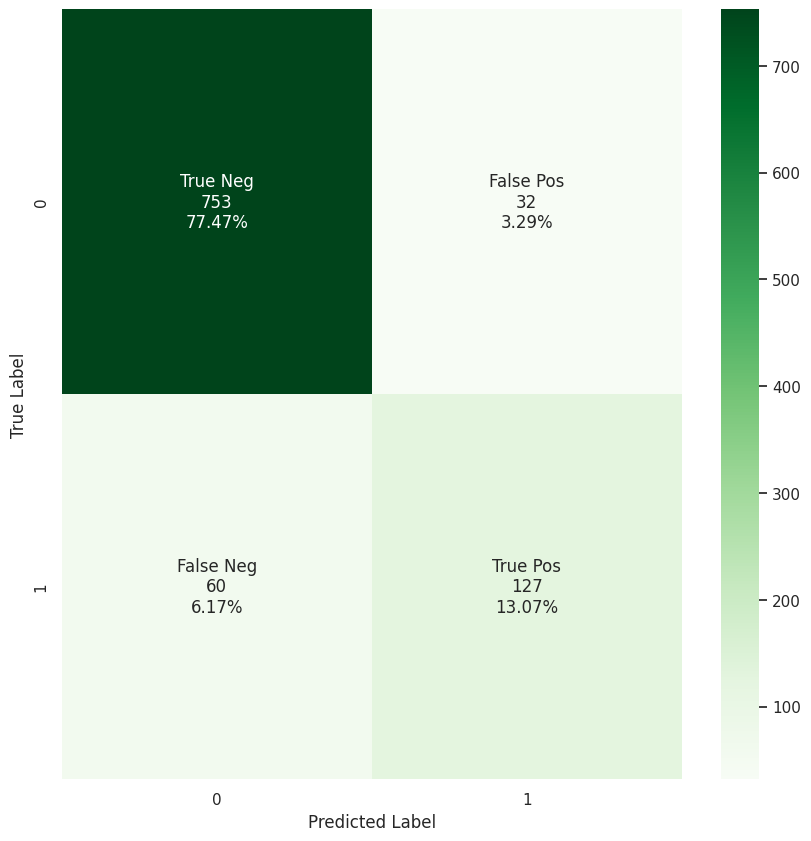

In [62]:
svc_cm = confusion_matrix(y_test, svc_pred)
group_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                    svc_cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                    svc_cm.flatten()/np.sum(svc_cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_name, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(svc_cm, annot=labels, fmt='', cmap='Greens')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

Text(0.5, 1.0, 'Comparing Model Coefficients for SVC')

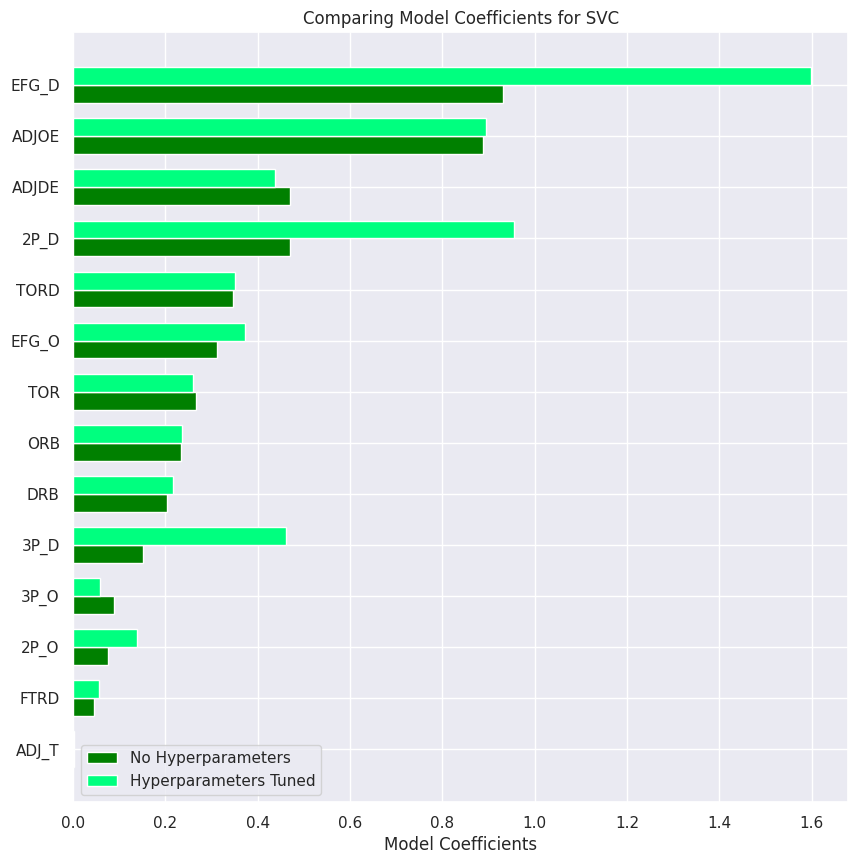

In [63]:
ind = np.arange(len(cbb_features.columns))
width = .35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.barh(ind,  abs(svc.coef_[0])[svc_sort], width, color='green', label='No Hyperparameters')
rects2 = ax.barh(ind + width, abs(svc_model.coef_[0])[svc_sort], width, color='springgreen', label='Hyperparameters Tuned')

ax.set_yticks(ind + width / 2)
ax.set_yticklabels(cbb_features.columns[svc_sort])
plt.legend(loc='best')
plt.xlabel("Model Coefficients")
plt.title("Comparing Model Coefficients for SVC")

In [64]:
cols = cbb_features.columns.to_list()

f_vals= forest_model.feature_importances_
dt_vals = dt_model.feature_importances_
svc_vals = abs(svc_model.coef_[0])

df = pd.DataFrame(columns=cols)

f_vals = f_vals.tolist()
dt_vals = dt_vals.tolist()
svc_vals = svc_vals.tolist()

df.loc[len(df)] = f_vals
df.loc[len(df)] = dt_vals
df.loc[len(df)] = svc_vals

df

ADJOE     ADJDE     EFG_O     EFG_D       TOR      TORD       ORB  \
0  0.296504  0.195626  0.065290  0.086124  0.052664  0.024992  0.038279   
1  0.042608  0.542518  0.117207  0.021288  0.043093  0.010382  0.070761   
2  0.894052  0.438489  0.372847  1.598827  0.260511  0.350494  0.236332   

        DRB      FTRD      2P_O      2P_D      3P_O      3P_D     ADJ_T  
0  0.020303  0.021575  0.047218  0.054633  0.040253  0.038426  0.018112  
1  0.013927  0.009583  0.049349  0.014142  0.036061  0.023849  0.005234  
2  0.215477  0.057229  0.138085  0.955315  0.058518  0.460462  0.001816

In [65]:
df = df.transpose()
ranks = df.rank(ascending=False)
ranks['avg'] = ranks.mean(numeric_only=True, axis=1)
ranks.sort_values(by=['avg'])

0     1     2        avg
ADJDE   2.0   1.0   5.0   2.666667
ADJOE   1.0   6.0   3.0   3.333333
EFG_O   4.0   2.0   6.0   4.000000
EFG_D   3.0   9.0   1.0   4.333333
2P_D    5.0  10.0   2.0   5.666667
TOR     6.0   5.0   8.0   6.333333
3P_D    9.0   8.0   4.0   7.000000
ORB    10.0   3.0   9.0   7.333333
2P_O    7.0   4.0  11.0   7.333333
3P_O    8.0   7.0  12.0   9.000000
TORD   11.0  12.0   7.0  10.000000
DRB    13.0  11.0  10.0  11.333333
FTRD   12.0  13.0  13.0  12.666667
ADJ_T  14.0  14.0  14.0  14.000000

In [18]:
from bs4 import BeautifulSoup
import pandas as pd
with open('torvik.html', 'r') as f: 
    page = f.read()

soup = BeautifulSoup(page, 'html.parser')

table = soup.find("table")
rows = soup.find_all("tr")

In [ ]:
teams = []
for r in rows[2:]:
    cols = r.find_all("td")
    
    try:
        if cols[1].text != "":
            team_name = cols[1].text
            
            data_list = [team_name, float(cols[5].text), float(cols[6].text), float(cols[7].text), float(cols[8].text[:2]), 
                float(cols[9].text[:2]), float(cols[10].text[:2]), float(cols[11].text[:2]), 
                float(cols[12].text[:2]), float(cols[13].text[:2]), float(cols[14].text[:2]), 
                float(cols[15].text[:2]), float(cols[16].text[:2]), float(cols[17].text[:2]), 
                float(cols[18].text[:2]), float(cols[19].text[:2]), float(cols[20].text[:2]), 
                float(cols[21].text)]
            print(data_list)
            teams.append(data_list)
            
    except:
        pass

In [29]:
teams = []

col = rows[2].find_all("td")
print(col)
for i in cols:
    print(cols[i])

[<td style="text-align:center;font-size:8px">2</td>, <td class="teamname"><a href="https://barttorvik.com/team.php?team=Duke&amp;year=2026" style="text-decoration: none;">Duke</a></td>, <td class="mobileout" style="text-align:center"><a href="https://barttorvik.com/conf.php?conf=ACC">ACC</a></td>, <td style="background-color:#AADBB9;text-align:center;padding-right:1px">118.3<span style="font-size:8px;"><br/>7<span></span></span></td>, <td style="background-color:#A8DAB6;text-align:center">91.5<span style="font-size:8px;"><br/>4<span></span></span></td>, <td style="text-align:center">.9502</td>, <td style="text-align:center">24-7</td>, <td class="mobileout" style="text-align:center">14-4</td>, <td class="mobileout" style="text-align:center">26.4%</td>, <td class="mobileout" style="text-align:center">21.8%</td>, <td class="mobileout" style="text-align:center">90.5</td>, <td class="mobileout" style="text-align:center">0.84</td>, <td class="mobileout" style="text-align:center"><a href="htt

TypeError: list indices must be integers or slices, not Tag

In [ ]:

col_names = ['TEAM',
 'ADJOE',
 'ADJDE',
 'BARTHAG',
 'EFG_O',
 'EFG_D',
 'TOR',
 'TORD',
 'ORB',
 'DRB',
 'FTR',
 'FTRD',
 '2P_O',
 '2P_D',
 '3P_O',
 '3P_D',
 'ADJ_T',
 'WAB']

df = pd.DataFrame(columns=col_names)

for i, team_data in enumerate(teams):
    df = df.append(dict(zip(col_names, team_data)), ignore_index=True)

0.9502
0.9443
0.9415
0.9412
0.9371
0.9334
0.9332
0.9322
0.9283
0.928
0.9271
0.9264
0.9232
0.9194
0.9176
0.9174
0.9137
0.9131
0.9117
0.9107
0.9086
0.9081
0.905
0.9028
0.9009
0.893
0.8921
0.8913
0.8852
0.8811
0.8775
0.875
0.8743
0.8721
0.8719
0.8717
0.8697
0.8692
0.8691
0.8646
0.8612
0.8529
0.8505
0.8469
0.8423
0.8388
0.8363
0.8351
0.8347
0.833
0.828
0.8279
0.8234
0.8233
0.8164
0.813
0.8121
0.8082
0.8077
0.7979
0.7938
0.7857
0.7823
0.7772
0.7762
0.7755
0.7725
0.7713
0.7711
0.7711
0.7635
0.7631
0.7621
0.7611
0.7496
0.7474
0.7456
0.7439
0.7429
0.7423
0.7397
0.7369
0.7297
0.7277
0.7259
0.7122
0.7081
0.7073
0.7032
0.6995
0.6985
0.6965
0.6945
0.6886
0.6874
0.6868
0.6852
0.6809
0.6716
0.6715
0.6709
0.67
0.6676
0.6652
0.6647
0.6607
0.6602
0.659
0.6536
0.6515
0.6392
0.6302
0.6197
0.6169
0.6127
0.6091
0.6027
0.5997
0.5955
0.591
0.5884
0.5864
0.5856
0.5853
0.5824
0.5753
0.5748
0.5744
0.5726
0.5698
0.5634
0.5619
0.561
0.5586
0.5523
0.5488
0.5478
0.5468
0.5436
0.5424
0.5361
0.5345
0.5264
0.5223
0.51

In [14]:
teams = df['TEAM']
cbb_now = df.drop(columns=['BARTHAG', 'ADJ_T', 'WAB', 'FTR', 'TEAM'])
cbb_now.head()

Empty DataFrame
Columns: [ADJOE, ADJDE, EFG_O, EFG_D, TOR, TORD, ORB, DRB, FTRD, 2P_O, 2P_D, 3P_O, 3P_D]
Index: []

In [68]:
x_predict = scaler.fit_transform(cbb_now)

forest_predict = forest_model.predict(x_predict)
df['POSTSEASON'] = forest_predict

df2 = df.drop(columns=['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB'])

march_madness = df2[df2["POSTSEASON"] == True]

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by StandardScaler.

In [ ]:
print("Teams that will make the March Madness Tournament:")
march_madness.head(55)